# Hierarchical

In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [8]:
air = pd.read_csv("C:\\Users\\HP\\Downloads\\EastWestAirlines.csv")

In [10]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [20]:
air2=air.drop(['ID#','Award?'],axis=1)
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [21]:
air2[air2.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
3876,1000,0,1,1,1,0,0,0,0,1597


In [22]:
air2=air2.drop_duplicates()

In [23]:
air2[air2.duplicated()]

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll


In [24]:
air2.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
dtype: int64

In [25]:
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [26]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
df_norm = norm_func(air2)

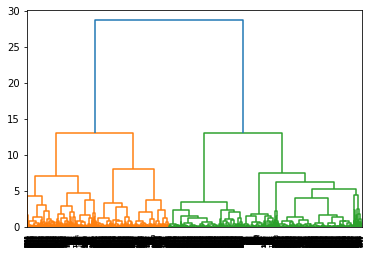

In [28]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

In [29]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [30]:
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [31]:
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
3993,2
3994,2
3995,4
3996,2


In [32]:
y_hc=hc.fit_predict(df_norm)

In [33]:
y_hc

array([0, 0, 0, ..., 4, 2, 2], dtype=int64)

In [34]:
air2['h_clusterid']=hc.labels_

C:\Users\HP\AppData\Local\Temp/ipykernel_6156/803302112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air2['h_clusterid']=hc.labels_


In [35]:
air2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,2
3995,64385,0,1,1,1,981,5,0,0,1395,2
3996,73597,0,3,1,1,25447,8,0,0,1402,4
3997,54899,0,1,1,1,500,1,500,1,1401,2


# kmeans

In [36]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [37]:
air3 = pd.read_csv("C:\\Users\\HP\\Downloads\\EastWestAirlines.csv")

In [38]:
air3=air.drop(['ID#','Award?'],axis=1)
air3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [39]:
air3=air3.drop_duplicates()

In [40]:
air3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [48]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [49]:
df_norm = norm_func(air3)
df_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [50]:
model=KMeans(n_clusters=5) 
model.fit(df_norm)

model.labels_

array([3, 3, 3, ..., 0, 1, 1])

In [51]:
md=pd.Series(model.labels_)
air3['clust']=md
df_norm.head()

C:\Users\HP\AppData\Local\Temp/ipykernel_6156/3981074051.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air3['clust']=md


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [52]:
air3.groupby(air3.clust).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,
0.0,82947.578761,121.803540,3.477876,1.001770,1.008850,30939.610619,17.800000,408.081416,1.212389,2736.049558
1.0,40628.279390,122.455733,1.121916,1.021045,1.005080,4863.154572,7.372279,404.023222,1.174891,2166.964441
2.0,150081.274583,206.335807,4.461967,1.000000,1.050093,59219.081633,20.935065,683.432282,2.024119,5957.920223
3.0,64012.298161,170.142304,1.000000,1.025169,1.002904,4227.212972,6.897386,508.451113,1.567280,5710.988383
4.0,92236.578838,107.425311,2.665975,1.004149,1.014523,16792.815353,16.122407,329.570539,0.993776,5859.769710


In [56]:
air3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,3.0
1,19244,0,1,1,1,215,2,0,0,6968,3.0
2,41354,0,1,1,1,4123,4,0,0,7034,3.0
3,14776,0,1,1,1,500,1,0,0,6952,3.0
4,97752,0,4,1,1,43300,26,2077,4,6935,2.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1.0
3995,64385,0,1,1,1,981,5,0,0,1395,0.0
3996,73597,0,3,1,1,25447,8,0,0,1402,1.0
3997,54899,0,1,1,1,500,1,500,1,1401,1.0


# DBscan

In [57]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [58]:
air4 = pd.read_csv("C:\\Users\\HP\\Downloads\\EastWestAirlines.csv")

In [59]:
air4=air.drop(['ID#','Award?'],axis=1)
air4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [60]:
air4=air4.drop_duplicates()

In [61]:
air4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [62]:
df=air4

In [63]:
df.values

array([[28143,     0,     1, ...,     0,     0,  7000],
       [19244,     0,     1, ...,     0,     0,  6968],
       [41354,     0,     1, ...,     0,     0,  7034],
       ...,
       [73597,     0,     3, ...,     0,     0,  1402],
       [54899,     0,     1, ...,   500,     1,  1401],
       [ 3016,     0,     1, ...,     0,     0,  1398]], dtype=int64)

In [64]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [65]:
x

array([[-4.51293870e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.39523468e+00],
       [-5.39604653e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.37973643e+00],
       [-3.20192202e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01,  1.41170157e+00],
       ...,
       [-2.23153612e-04, -1.86322793e-01,  6.82893866e-01, ...,
        -3.28648790e-01, -3.62219103e-01, -1.31599028e+00],
       [-1.85776026e-01, -1.86322793e-01, -7.69731660e-01, ...,
         2.84455375e-02, -9.85832074e-02, -1.31647460e+00],
       [-7.00646048e-01, -1.86322793e-01, -7.69731660e-01, ...,
        -3.28648790e-01, -3.62219103e-01, -1.31792757e+00]])

In [66]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [67]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [68]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [69]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
3993,0
3994,0
3995,0
3996,0


In [70]:
pd.concat([air4,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,cluster
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0
2,41354.0,0.0,1.0,1.0,1.0,4123.0,4.0,0.0,0.0,7034.0,0.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0
4,97752.0,0.0,4.0,1.0,1.0,43300.0,26.0,2077.0,4.0,6935.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476.0,0.0,1.0,1.0,1.0,8525.0,4.0,200.0,1.0,1403.0,0.0
3995,64385.0,0.0,1.0,1.0,1.0,981.0,5.0,0.0,0.0,1395.0,0.0
3996,73597.0,0.0,3.0,1.0,1.0,25447.0,8.0,0.0,0.0,1402.0,0.0
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0
